# Void Number density

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.cosmology import LambdaCDM

In [9]:
cosmo = LambdaCDM(H0=100, Om0=0.3089, Ode0=0.6911)
cosmomice = LambdaCDM(H0=100, Om0=0.25, Ode0=0.75)

In [45]:
Mr = 20
Delta = 0.9

In [46]:
L_mg = np.loadtxt(f'cats/voids_MG_Mr-{Mr}_Delta-{Delta}.dat').T
L_gr = np.loadtxt(f'cats/voids_GR_Mr-{Mr}_Delta-{Delta}.dat').T
L_mice = np.loadtxt('../../FAMAF/Lensing/cats/MICE/voids_MICE.dat').T

New catalogs columns name

| 0     | 1        | 2        | 3   | 4     | 5     | 6     | 7          | 8          | 9    | 10   | 11   |
|-------|----------|----------|-----|-------|-------|-------|------------|------------|------|------|------|
| $R_v$ | $\alpha$ | $\delta$ | $z$ | $x_v$ | $y_v$ | $z_v$ | $\Delta_1$ | $\Delta_2$ | LogP | Diff | flag |

In [47]:
L_mg = L_mg[:,L_mg[11] >= 2.0]
L_gr = L_gr[:,L_gr[11] >= 2.0]
L_mice = L_mice[:,L_mice[11] >= 2.0]

In [ ]:
# rho1_MG_21_08 = L_mg[7]
# rho1_MG_21_09 = L_mg[7]
# rho1_MG_20_08 = L_mg[7]
# rho1_MG_20_09 = L_mg[7]


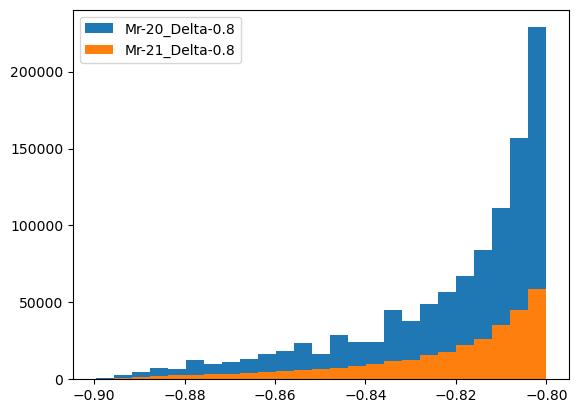

In [51]:
plt.hist(rho1_MG_20_08, bins=25, label='Mr-20_Delta-0.8')
# plt.hist(rho1_MG_20_09, bins=25, label='Mr-20_Delta-0.9')
plt.hist(rho1_MG_21_08, bins=25, label='Mr-21_Delta-0.8')
# plt.hist(rho1_MG_21_09, bins=25, label='Mr-21_Delta-0.9')
plt.legend()

In [33]:
Rv = np.array([[rvbins[j],rvbins[j+1]] for j in range(M-1)])
print(Rv)

[[ 7.39937    10.62495695]
 [10.62495695 15.25666511]
 [15.25666511 21.90746104]
 [21.90746104 31.45752007]
 [31.45752007 45.17071   ]]


(array([291., 149.,  78.,  53.,  36.,  11.,   6.,   3.,   2.,   4.]),
 array([31.46408 , 32.734271, 34.004462, 35.274653, 36.544844, 37.815035,
        39.085226, 40.355417, 41.625608, 42.895799, 44.16599 ]),
 <BarContainer object of 10 artists>)

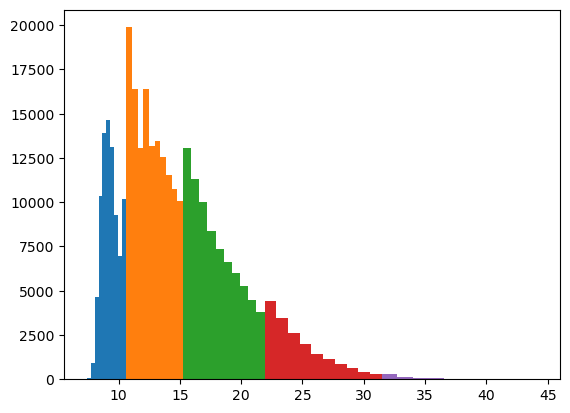

In [26]:
plt.hist((L_mg[0,masks_mg[0]]),bins=10)
plt.hist((L_mg[0,masks_mg[1]]),bins=10)
plt.hist((L_mg[0,masks_mg[2]]),bins=10)
plt.hist((L_mg[0,masks_mg[3]]),bins=10)
plt.hist((L_mg[0,masks_mg[4]]),bins=10)

In [10]:
N = 50
zbins = np.linspace(0.1,0.6,N)
z = zbins[:-1] + np.diff(zbins)*0.5
comdist = cosmo.comoving_distance(zbins).value
comdist_mice = cosmomice.comoving_distance(zbins).value
x = comdist[:-1] + np.diff(comdist)*0.5
x_mice = comdist_mice[:-1] + np.diff(comdist_mice)*0.5
volcom = np.array([4/3 * np.pi * (comdist[j+1]**3 - comdist[j]**3) for j in range(N-1)])
volcom_mice = np.array([4/3 * np.pi * (comdist_mice[j+1]**3 - comdist_mice[j]**3) for j in range(N-1)]) / 8

In [11]:
vdist_mg = np.array([np.sqrt(np.sum(L_mg[4:7, masks_mg[j]]**2,axis=0)) for j in range(M-1)])
vdist_gr = np.array([np.sqrt(np.sum(L_gr[4:7, masks_gr[j]]**2,axis=0)) for j in range(M-1)])
vdist_mice = np.array([np.sqrt(np.sum(L_mice[5:8, masks_mice[j]]**2,axis=0)) for j in range(M-1)])

/tmp/ipykernel_19961/769621352.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  vdist_mg = np.array([np.sqrt(np.sum(L_mg[4:7, masks_mg[j]]**2,axis=0)) for j in range(M-1)])
/tmp/ipykernel_19961/769621352.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  vdist_gr = np.array([np.sqrt(np.sum(L_gr[4:7, masks_gr[j]]**2,axis=0)) for j in range(M-1)])
/tmp/ipykernel_19961/769621352.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) 

In [12]:
nv_mg = np.array([
    [np.sum((vdist_mg[i] >= comdist[j]) & (vdist_mg[i] < comdist[j+1])) for j in range(N-1)] for i in range(M-1)
])

v_den_mg = nv_mg / volcom
err_v_den_mg = nv_mg/(np.sqrt(nv_mg)*volcom)

/tmp/ipykernel_19961/279768038.py:6: RuntimeWarning: invalid value encountered in divide
  err_v_den_mg = nv_mg/(np.sqrt(nv_mg)*volcom)


In [13]:
nv_gr = np.array([
    [np.sum((vdist_gr[i] >= comdist[j]) & (vdist_gr[i] < comdist[j+1])) for j in range(N-1)] for i in range(M-1)
])

v_den_gr = nv_gr / volcom
err_v_den_gr = nv_gr/(np.sqrt(nv_gr)*volcom)

/tmp/ipykernel_19961/2137770153.py:6: RuntimeWarning: invalid value encountered in divide
  err_v_den_gr = nv_gr/(np.sqrt(nv_gr)*volcom)


In [14]:
nv_mice = np.array([
    [np.sum((vdist_mice[i] >= comdist_mice[j]) & (vdist_mice[i] < comdist_mice[j+1])) for j in range(N-1)] for i in range(M-1)
]) / volcom_mice

v_den_mice = nv_mice / volcom_mice
err_v_den_mice = nv_mice / (np.sqrt(nv_mice) * volcom_mice)

/tmp/ipykernel_19961/94269839.py:6: RuntimeWarning: invalid value encountered in divide
  err_v_den_mice = nv_mice / (np.sqrt(nv_mice) * volcom_mice)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


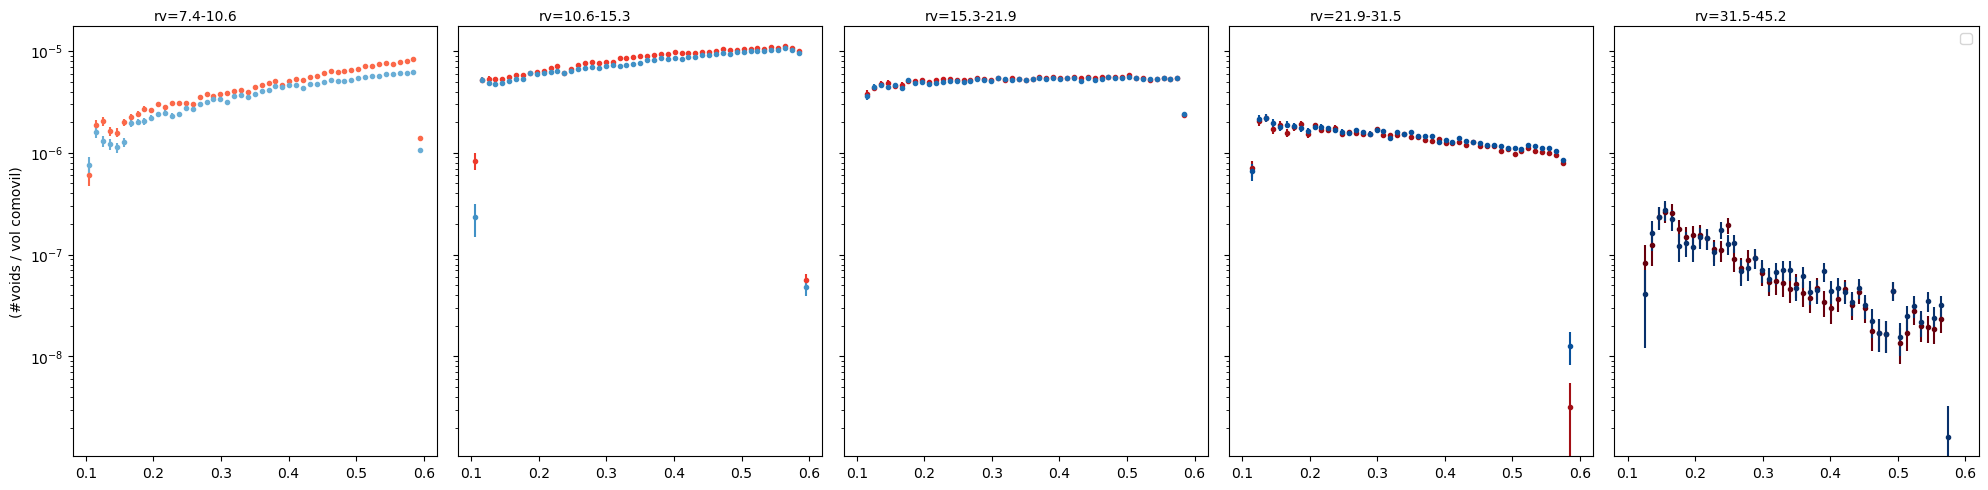

In [15]:
fig, axes = plt.subplots(1,M-1,figsize=(20,5), sharey=True, layout='tight')

colormap = plt.cm.Reds
colors = [colormap(i) for i in np.linspace(0.5, 1,M-1)]
for i in range(M-1):
    axes[i].errorbar(z, v_den_mg[i], yerr=err_v_den_mg[i], c=colors[i], fmt='.')

colormap = plt.cm.Blues 
colors = [colormap(i) for i in np.linspace(0.5, 1,M-1)]
for i in range(M-1):
    axes[i].errorbar(z, v_den_gr[i], yerr=err_v_den_gr[i], c=colors[i], fmt='.')

# colormap = plt.cm.Greens 
# colors = [colormap(i) for i in np.linspace(0.5, 1,M-1)]
# for i in range(M-1):
#     axes[i].plot(z, v_den_mice[i], c=colors[i])

for i in range(M-1):
    axes[i].text(0.2, 2e-5, f'rv={np.round(rvbins[i],1)}-{np.round(rvbins[i+1],1)}')

# plt.xlabel('redshift')
axes[0].set_ylabel('(#voids / vol comovil)')
plt.semilogy()
plt.legend()
plt.show()

# Multiplicity function (Verza et al 2024)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def B(S, alpha, beta, gamma):
    return alpha*(1+(beta/S)**gamma)

In [4]:
def dB(S, alpha, beta, gamma):
    return -((alpha*gamma*(beta/S)**gamma)/S)

def D(S):
    ## < (d \delta_S / dS)^2 >
    pass

def S(R):
    ## acá entra la cosmología: en el pwr spt lineal P(k)
    ## \int 1/( 2\pi^2 ) dk k^2 P(k) |W(kR)|^2
    pass

def P(k):
    ## linear pwr spectrum
    pass

def W(k):
    ## top hat filter in fourier space
    pass

In [5]:
def f(S):
    ## multipliticty function
    Gamma_dd = S*D(S) - 1/4
    Bterm = (B(S)/(2*S) - dB(S))**2
    SGterm = S/(2*Gamma_dd)
    term1 = np.sqrt(Gamma_dd/(2*np.pi*S)) * np.exp(- SGterm * Bterm )
    term2 = Bterm/2 * ( np.erf( np.sqrt(SGterm) * Bterm ) + 1 ) 
    fS = np.exp(-B(S)**2/(2*S))/(np.sqrt(2*np.pi*S)) * (term1 + term2)
    return fS

# Halo Mass Function

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from colossus.lss import mass_function
from colossus.cosmology import cosmology

In [7]:
from astropy.io import fits
from astropy.cosmology import LambdaCDMbdaCDM

In [9]:
cosmoparams = {'h':1.0, 'Om0':0.3089, 'Ode0':0.6911}
def vol(z0,z1,
        c=cosmoparams):

    cosmo = LambdaCDM(H0=100.0*c['h'], Om0=c['Om0'], Ode0=c['Ode0'])
    chi = cosmo.comoving_distance([z0,z1]).value
    volcom = 4/3 * np.pi * (chi[1]**3 - chi[0]**3)

    return volcom

In [2]:
### func eli
def compute_differential(logM, Volume,
                         lMmin = 10.5, lMmax = 15.5,
                         nbins = 80):

    lM_bins, lM_step = np.linspace(lMmin,lMmax,nbins,retstep = True)
    
    # Compute differential Halo mass
    H,xbins  = np.histogram(logM, bins = lM_bins)
    lM_dfbins  = xbins[:-1]+0.5*np.diff(xbins)
    delta_logM = xbins[1] - xbins[0]
    H, lM_dfbins = H[H>0],lM_dfbins[H>0]

    dndlM = H/(delta_logM*Volume)
    err = np.sqrt(H)/(delta_logM*Volume)

    return lM_dfbins, dndlM, err

In [163]:
def compute_cumulative(lL,diff):
    delta_x = (lL[-1]-lL[0]) / (lL.size-1)
    cF = np.flipud( # @UndefinedVariable
            np.cumsum( # @UndefinedVariable
                np.flipud( # @UndefinedVariable
                    diff
                )
            )
        ) * delta_x
    return cF, delta_x

In [33]:
GR = np.loadtxt('/home/fcaporaso/modified_gravity/statistics/hmf_GR_n1_z01-06_n80_logm10-15.csv', delimiter=',').T

In [140]:
with fits.open('/home/fcaporaso/cats/L768/GR_cosmohub19016.fits') as f:
    central = f[1].data.kind == 0
    logM_GR = f[1].data.halo_lm[central]
    z_gal_GR = f[1].data.true_redshift_gal[central]

In [141]:
with fits.open('/home/fcaporaso/cats/L768/MG_cosmohub19015.fits') as f:
    central = f[1].data.kind == 0
    logM_MG = f[1].data.halo_lm[central]
    z_gal_MG = f[1].data.true_redshift_gal[central]

In [274]:
GR = compute_differential(logM_GR[(z_gal_GR<0.6)&(z_gal_GR>=0.1)], vol(0.1,0.6))
MG = compute_differential(logM_MG[(z_gal_MG<0.6)&(z_gal_MG>=0.1)], vol(0.1,0.6))

In [275]:
GR_cum = compute_cumulative(GR[0],GR[1])
MG_cum = compute_cumulative(MG[0],MG[1])

In [276]:
z = 0.35
M = np.logspace(11,15,69)

In [277]:
planckcosmology = cosmology.setCosmology('planck15')
mfunc_planck = mass_function.massFunction(M, z, mdef = 'vir', model = 'despali16',q_out='dndlnM')*np.log(10.)

Text(0.5, 0, 'log M')

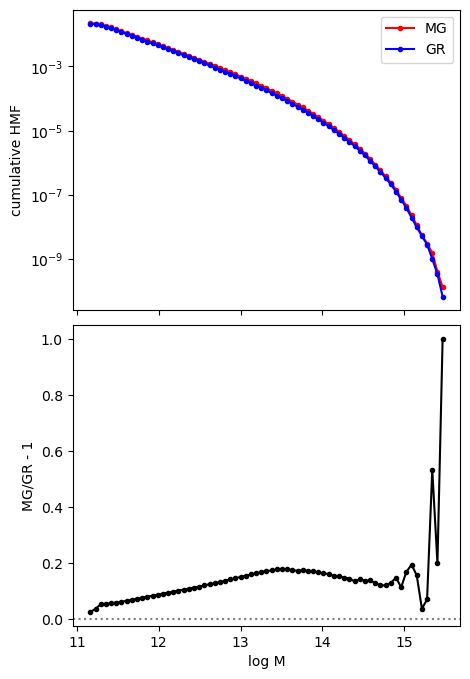

In [278]:
fig,(ax1,ax2) = plt.subplots(2,1, sharex=True, figsize=(5,8))
ax1.plot(MG[0],MG_cum[0],'.-', label='MG', c='r')
ax1.plot(GR[0],GR_cum[0],'.-', label='GR', c='b')
#ax1.set_xlim(11.3,15.5)
#ax1.set_ylim(1e-8,1e-1)
ax1.semilogy()
ax1.legend()
ax1.set_ylabel('cumulative HMF')
#ax1.set_title('GR')
ax2.plot(MG[0],MG_cum[0]/GR_cum[0] - 1, 'k.-')
ax2.set_ylabel('MG/GR - 1')
#ax2.set_ylim(-0.05,0.25)
ax2.axhline(0, ls=':', c='k', alpha=0.5)
fig.subplots_adjust(hspace=0.05,wspace=0.1)
ax2.set_xlabel('log M')

# Lensing

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def cov_matrix(array):
        
    K = len(array)
    Kmean = np.average(array,axis=0)
    bins = array.shape[1]
    
    COV = np.zeros((bins,bins))
    
    for k in range(K):
        dif = (array[k]- Kmean)
        COV += np.outer(dif,dif)        
    
    COV *= (K-1)/K
    return COV

In [10]:
S = {}
DSt = {}
DSx = {}

In [25]:
with fits.open('profiles/Rv10-11/TEST_LCDM_rbin0.fits') as f:
    # S['LCDM'] = f[1].data.Sigma.reshape(101,10)
    # DSt['LCDM'] = f[1].data.DSigma_T.reshape(101,10)
    # DSx['LCDM'] = f[1].data.DSigma_X.reshape(101,10)
    head = f[0].header

In [26]:
head

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
NVOIDS  =                  430                                                  
CAT     = '/home/fcaporaso/cats/L768/voids_LCDM_09.dat'                         
RV_MIN  =                 10.0                                                  
RV_MAX  =                 11.0                                                  
RV_MEAN =              10.5785                                                  
R1_MIN  =                 -1.0                                                  
R1_MAX  =                  1.0                                                  
R2_MIN  =                 -1.0                                                  
R2_MAX  =                100

In [12]:
with fits.open('profiles/Rv10-11/TEST_fR_rbin_0.fits') as f:
    S['fR'] = f[1].data.Sigma.reshape(101,10)
    DSt['fR'] = f[1].data.DSigma_T.reshape(101,10)
    DSx['fR'] = f[1].data.DSigma_X.reshape(101,10)

In [33]:
def lenscat_load(Rv_min, Rv_max, z_min, z_max, rho1_min, rho1_max, rho2_min, rho2_max, 
                 flag=2.0, lensname="voids_LCDM_09.dat",
                 split=False, NSPLITS=1,
                 octant=True):

    ## 0:Rv, 1:ra, 2:dec, 3:z, 4:xv, 5:yv, 6:zv, 7:rho1, 8:rho2, 9:logp, 10:diff CdM y CdV, 11:flag
    ## CdM: centro de masa
    ## CdV: centro del void
    L = np.loadtxt('cats/'+lensname).T

    if octant:
        # selecciono los void en un octante
        eps = 1.0
        L = L[:, (L[1] >= 0.0+eps) & (L[1] <= 90.0-eps) & (L[2]>= 0.0+eps) & (L[2] <= 90.0-eps)]

    nk = 100 ## para cambiarlo hay que repensar el calculo de (dra,ddec) y el doble for loop
    NNN = len(L[0]) ##total number of voids
    ra,dec = L[1],L[2]
    K    = np.zeros((nk+1,NNN))
    K[0] = np.ones(NNN).astype(bool)

    ramin  = np.min(ra)
    cdec   = np.sin(np.deg2rad(dec))
    decmin = np.min(cdec)
    dra    = ((np.max(ra)+1.e-5) - ramin)/10.
    ddec   = ((np.max(cdec)+1.e-5) - decmin)/10.

    c = 1
    for a in range(10): 
        for d in range(10): 
            mra  = (ra  >= ramin + a*dra)&(ra < ramin + (a+1)*dra) 
            mdec = (cdec >= decmin + d*ddec)&(cdec < decmin + (d+1)*ddec) 
            K[c] = ~(mra&mdec)
            c += 1

    mask = (L[0] >= Rv_min) & (L[0] < Rv_max) & (L[3] >= z_min) & (L[3] < z_max) & (
            L[7] >= rho1_min) & (L[7] < rho1_max) & (L[8] >= rho2_min) & (L[8] < rho2_max) & (L[11] >= flag)

    nvoids = mask.sum()
    L = L[:,mask]

    if split:
        if NSPLITS > nvoids:
            NSPLITS = nvoids
        lbins = int(round(nvoids/float(NSPLITS), 0))
        slices = ((np.arange(lbins)+1)*NSPLITS).astype(int)
        slices = slices[(slices < nvoids)]
        L = np.split(L.T, slices)
        K = np.split(K.T, slices)

    return L, K, nvoids


In [44]:
L_lcdm,_,nv_lcdm = lenscat_load(10.0, 11.0, 0.2, 0.25, -1.0, 0.0, -1.0, 100.0, 
                 flag=2.0, lensname="voids_LCDM_09.dat",
                 split=False, NSPLITS=1,
                 octant=True)

L_fr,_,nv_fr = lenscat_load(10.0, 11.0, 0.2, 0.25, -1.0, 0.0, -1.0, 100.0, 
                 flag=2.0, lensname="voids_fR_09.dat",
                 split=False, NSPLITS=1,
                 octant=True)

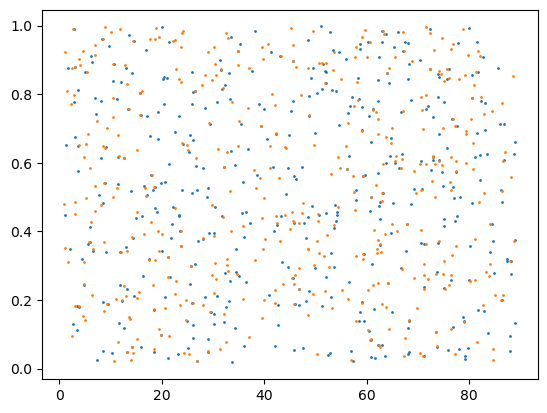

In [46]:
plt.scatter(L_lcdm[1],np.sin(np.pi*L_lcdm[2]/180.0),
           s=1)

plt.scatter(L_fr[1],np.sin(np.pi*L_fr[2]/180.0),
           s=1)